In [ ]:
!pip install tensorflow-gpu

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_array = cv2.imread("Dataset/Closed_Eyes/image_name.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
plt.imshow(img_array, cmap='gray')

In [ ]:
img_array.shape

In [ ]:
DATA_DIRECTORY = "Dataset/"
classes = ['Closed_Eyes', 'Open_Eyes']
for category in classes:
    path = os.path.join(DATA_DIRECTORY, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [ ]:
img_size = 224

In [ ]:
new_array = cv2.resize(back_to_rgb, (img_size, img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

###**bold text** **Reading all the images and converting them into an array for data and labels**

In [ ]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(DATA_DIRECTORY, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(back_to_rgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print("Exception Found:" + e)
                

In [ ]:
create_training_data()

In [ ]:
len(training_data)

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
x = []
y = []

for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3)

In [ ]:
x.shape

In [ ]:
# normalize the data
x = x / 255.0

In [ ]:
y = np.array(y)

In [ ]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

###**Deep Learning Model for training - Transfer Learning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

#### Transfer Learning

In [ ]:
base_input = model.layers[0].input  ## input

In [ ]:
base_output = model.layers[-4].output ## output

In [ ]:
flat_layers = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layers)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
new_model.summary()

####**Settings for binary Classification (open/closed)**

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
## TODO
new_model.fit(x, y, epochs)

In [ ]:
import os

In [ ]:
os.listdir('drive/MyDrive/DD')

In [ ]:
len(os.listdir('drive/MyDrive/Drowsy/Dataset/Closed'))

In [ ]:
img_array = cv2.imread("drive/MyDrive/Drowsy/Dataset/Closed/s0001_01842_0_0_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
plt.imshow(img_array)

In [ ]:
img_array.shape

In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
os.listdir('drive/MyDrive/Drowsy/Dataset')

In [ ]:
img_array = cv2.imread("drive/MyDrive/Drowsy/Dataset/Closed/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
plt.imshow(img_array, cmap="gray")

In [ ]:
img_array.shape

In [ ]:
# Preparing data
DATA_DIRECTORY = "drive/MyDrive/Drowsy/Dataset/"
classes = ['Closed', 'Open']
for category in classes:
    path = os.path.join(DATA_DIRECTORY, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [ ]:
img_size = 224
new_array = cv2.resize(back_to_rgb, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [ ]:
new_array.shape

In [ ]:
## READING all images and converting them into an array for data and labels

In [ ]:
training_data = []
def create_training_data():
    num = 1
    for category in classes:
        path = os.path.join(DATA_DIRECTORY, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                print(num);num += 1
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(back_to_rgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print("Exception Found" + e)


In [ ]:
create_training_data()

In [ ]:
len(training_data)

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
X, Y = [], []
for features, label in training_data:
    X.append(features)
    Y.append(label)


In [ ]:
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

In [ ]:
# Normalize the data
X = X / 255.0

In [ ]:
Y = np.array(Y)

In [ ]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("x.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
Y = pickle.load(pickle_in)

In [ ]:
## DEEP LEARNING MODEL - Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

In [ ]:
# Transfer Learning

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
my_model = keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
my_model.summary()

In [ ]:
my_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
my_model.fit(X, Y, epochs=5, verbose=1, validation_split=0.1) ## training and validation

In [ ]:
my_model.save('dd_model.h5')

In [ ]:
# TESTING THE MODEL on other inputs
# Predictions using the model

model = tf.keras.models.load_model('dd_model.h5')

In [ ]:
img_array = cv2.imread('test_image_closed.jpg', cv2.IMREAD_GRAYSCALE)
back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(back_to_rgb, (img_size, img_size))

In [ ]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)
x_input = x_input / 255.0

In [ ]:
x_input.shape

In [ ]:
plt.imshow(new_array)

In [ ]:
prediction = model.predict(x_input)

In [ ]:
prediction

In [ ]:
prediction[0][0]

In [ ]:
if prediction < 0.5:print("True")
else:print("False")

In [ ]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

In [13]:
import random

In [ ]:
import os
os.listdir()
os.getcwd()

In [ ]:
img = cv2.imread('C:\\Users\\MUKESH\\Desktop\\test_1_open.jpg')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(img)

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

In [ ]:
for x, y, w, h in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("No eyes are detected.")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
import numpy as np

In [ ]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image / 255.0

In [ ]:
final_image.shape

In [ ]:
model = tf.keras.models.load_model('D:\\Tasks\\Major Project\\youtube\\Trained_Model\\dd_model.h5')

In [ ]:
model.predict(final_image)

In [17]:
import cv2
import beepy
path = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

#
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot Open Web Cam")

while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0

    prediction = model.predict(final_image)
    if prediction[0][0] > 0.5:
        status = "Open Eyes"
    else:
        beepy.beep(sound="robot_error")
        status = "Closed Eyes"


    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for x, y, w, h in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)
    
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame, status,
                    (50, 50),
                    font, 3,
                    (0,0,255),
                    2,
                    cv2.LINE_4)
        
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are n

In [ ]:
cap.release()

In [14]:
import cv2
import winsound

frequency = 2500
duration = 1000

path = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

#
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot Open Web Cam")
counter = 0
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0

    prediction = model.predict(final_image)
    if prediction > 0.5:
        status = "Open Eyes"
        cv2.putText(frame, status, (150, 150), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        # black background
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1 / 2)), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame, status, (150, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, x), (x + w, y + h), (0,0,0), -1)
        
        if counter > 5:
            x1, y1, w1, h1 = 0, 0, 175, 75
            
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            cv2.putText(frame, 'Alert! Alert!!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
#             winsound.Beep(frequency, duration)
            counter = 0


#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#     for x, y, w, h in faces:
#         cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 0, 255), 2)
    
#     font = cv2.FONT_HERSHEY_SIMPLEX

#     cv2.putText(frame, status,
#                     (50, 50),
#                     font, 3,
#                     (0,0,255),
#                     2,
#                     cv2.LINE_4)
        
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected


In [1]:
## BEGIN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import cv2
import matplotlib.pyplot as plt
import winsound

In [2]:
model = tf.keras.models.load_model('dd_model.h5')

In [ ]:
model.summary()

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [4]:
img = cv2.imread('test_1_open.jpg')

In [ ]:
plt.imshow(img)

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("No eyes are detected.")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]
            
# plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [6]:
final_image = cv2.resize(eyes_roi, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image / 255.0

model.predict(final_image)

array([[1.]], dtype=float32)

In [21]:
# Main

import cv2
import winsound
import beepy

frequency = 2500
duration = 1000

path = 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)


# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot Open Web Cam")
counter = 0
while True:
    ret, frame = cap.read()
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    x_ran = random.randint(1,10)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    
    for x, y, w, h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            pass
#             print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex: ex+ew]

    final_image = cv2.resize(eyes_roi, (224, 224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image / 255.0
    prediction = model.predict(final_image)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    
    if x_ran > 5 and prediction[0][0] > 0.5:
        status = "Open Eyes"
        cv2.putText(frame, status, (50, 450), font, 3, (0, 255, 0), 2, cv2.LINE_4)
        x1, y1, w1, h1 = 0, 0, 175, 75
        
        # black background
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        # add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1 / 2)), 
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
    else:
        counter = counter + 1
        status = "Closed Eyes"
        cv2.putText(frame, status, (50, 450), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        
        cv2.rectangle(frame, (x, x), (x + w, y + h), (0,0,0), -1)
        
        if counter > 5:
            x1, y1, w1, h1 = 0, 0, 175, 75
            
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            cv2.putText(frame, 'Alert! Alert!!', (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)
#             beepy.beep(sound="robot_error")
            # winsound.Beep(frequency, duration)
            counter = 0


#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#     for x, y, w, h in faces:
#         cv2.rectangle(frame, (x,y), (x+w,y+h), (0, 0, 255), 2)
    
#     font = cv2.FONT_HERSHEY_SIMPLEX

#     cv2.putText(frame, status,(50, 50),font, 3,(0,0,255),2,cv2.LINE_4)
        
    cv2.imshow('Drowsiness Detection', frame)

    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [19]:
# cap.release()

In [12]:
import winsound
winsound.Beep(2500,2000)

In [9]:
import beepy
beepy.beep(sound="ping")

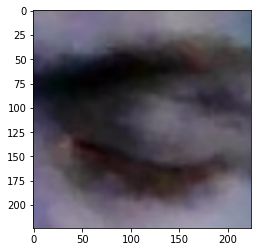

In [27]:
plt.imshow(test)

(224, 224, 3)

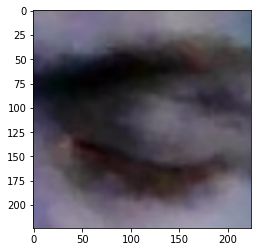

In [30]:
plt.imshow(test)
test.shape

In [33]:


final_image = np.expand_dims(test, axis=0)
final_image = final_image / 255.0
prediction = model.predict(final_image)

In [31]:
final_image.shape

(1, 224, 224, 3)

In [34]:
prediction

array([[0.99227995]], dtype=float32)

In [8]:
import winsound
winsound.Beep(2500,2000)

In [ ]:
import beepy
beepy.beep(sound="robot_r")